# File to load the data and investigate

In [1]:
import csv
import sqlite3
import pandas as pd
import matplotlib as plt
%matplotlib inline
import numpy as np

# Read in the data

In [2]:
reddit_data = pd.read_csv('../data/reddit_2016_1_all.csv');

In [3]:
# The comments that were deleted were not removed from the data set. We remove the [deleted] user with

reddit_data = reddit_data[reddit_data.author!="[deleted]"]

In [4]:
# Let's look at the most basic user statistics for these features
reddit_data.max()

year                                              2016
month                                                1
author                            zzzzzzzzzzzzzzzzspaf
total_number_posts                               30676
num_subreddit_comment                             3423
total_length_comment                         295615602
total_score_comment                             461405
total_controversiality_comment                     735
total_gold_comment                                  50
total_number_comment                            426967
num_subreddit_post                                1184
total_number_post_comments                      933667
total_score_post                                649158
total_length_post                              2089188
total_gold_post                                     11
dtype: object

In [30]:
reddit_data.min()

year                                              2016
month                                                1
author                            -------------------x
total_number_posts                                   0
num_subreddit_comment                                0
total_length_comment                                 0
total_score_comment                              -8149
total_controversiality_comment                       0
total_gold_comment                                   0
total_number_comment                                 0
num_subreddit_post                                   0
total_number_post_comments                           0
total_score_post                                     0
total_length_post                                    0
total_gold_post                                      0
dtype: object

In [114]:
# Computing the normalized features from the imported data

num_comments_on_post_per_post = pd.DataFrame({'num_comments_on_post_per_post':reddit_data['total_number_post_comments']/reddit_data.total_number_posts}).fillna(0)
total_score_per_post = pd.DataFrame({'total_score_per_post':reddit_data['total_score_post']/reddit_data.total_number_posts}).fillna(0)
total_length_post_per_post = pd.DataFrame({'total_length_post_per_post':reddit_data['total_length_post']/reddit_data.total_number_posts}).fillna(0)
total_gold_per_post = pd.DataFrame({'total_gold_per_post':reddit_data['total_gold_post']/reddit_data.total_number_posts}).fillna(0)
num_posts_per_subreddit = pd.DataFrame({'num_posts_per_subreddit':reddit_data['total_number_posts']/reddit_data.num_subreddit_post}).fillna(0)

total_score_per_comment = pd.DataFrame({'total_score_per_comment':reddit_data['total_score_comment']/reddit_data.total_number_comment}).fillna(0)
total_length_comment_per_comment = pd.DataFrame({'total_length_comment_per_comment':reddit_data['total_length_comment']/reddit_data.total_number_comment}).fillna(0)
total_gold_per_comment = pd.DataFrame({'total_gold_per_comment':reddit_data['total_gold_comment']/reddit_data.total_number_comment}).fillna(0)
num_comments_per_subreddit = pd.DataFrame({'num_comments_per_subreddit':reddit_data['total_number_comment']/reddit_data.num_subreddit_comment}).fillna(0)
num_controversial_comments_per_comment = pd.DataFrame({'num_controversial_comments_per_comment':reddit_data['total_controversiality_comment']/reddit_data.total_number_comment}).fillna(0)





In [122]:
data = pd.concat([reddit_data.author,reddit_data.total_number_posts,reddit_data.total_number_comment,num_comments_on_post_per_post,total_score_per_post,total_length_post_per_post,total_gold_per_post,num_posts_per_subreddit,total_score_per_comment,total_length_comment_per_comment,total_gold_per_comment,num_comments_per_subreddit,num_controversial_comments_per_comment],axis=1).replace(np.inf,0)


# Implement K-Means

In [45]:
import seaborn as sns

In [46]:
sns.set()

In [65]:
data_subset = data.sample(100000)

In [49]:
data_subset.shape

(100000, 13)

In [ ]:
# Plotting scatter plots for all pairs of features

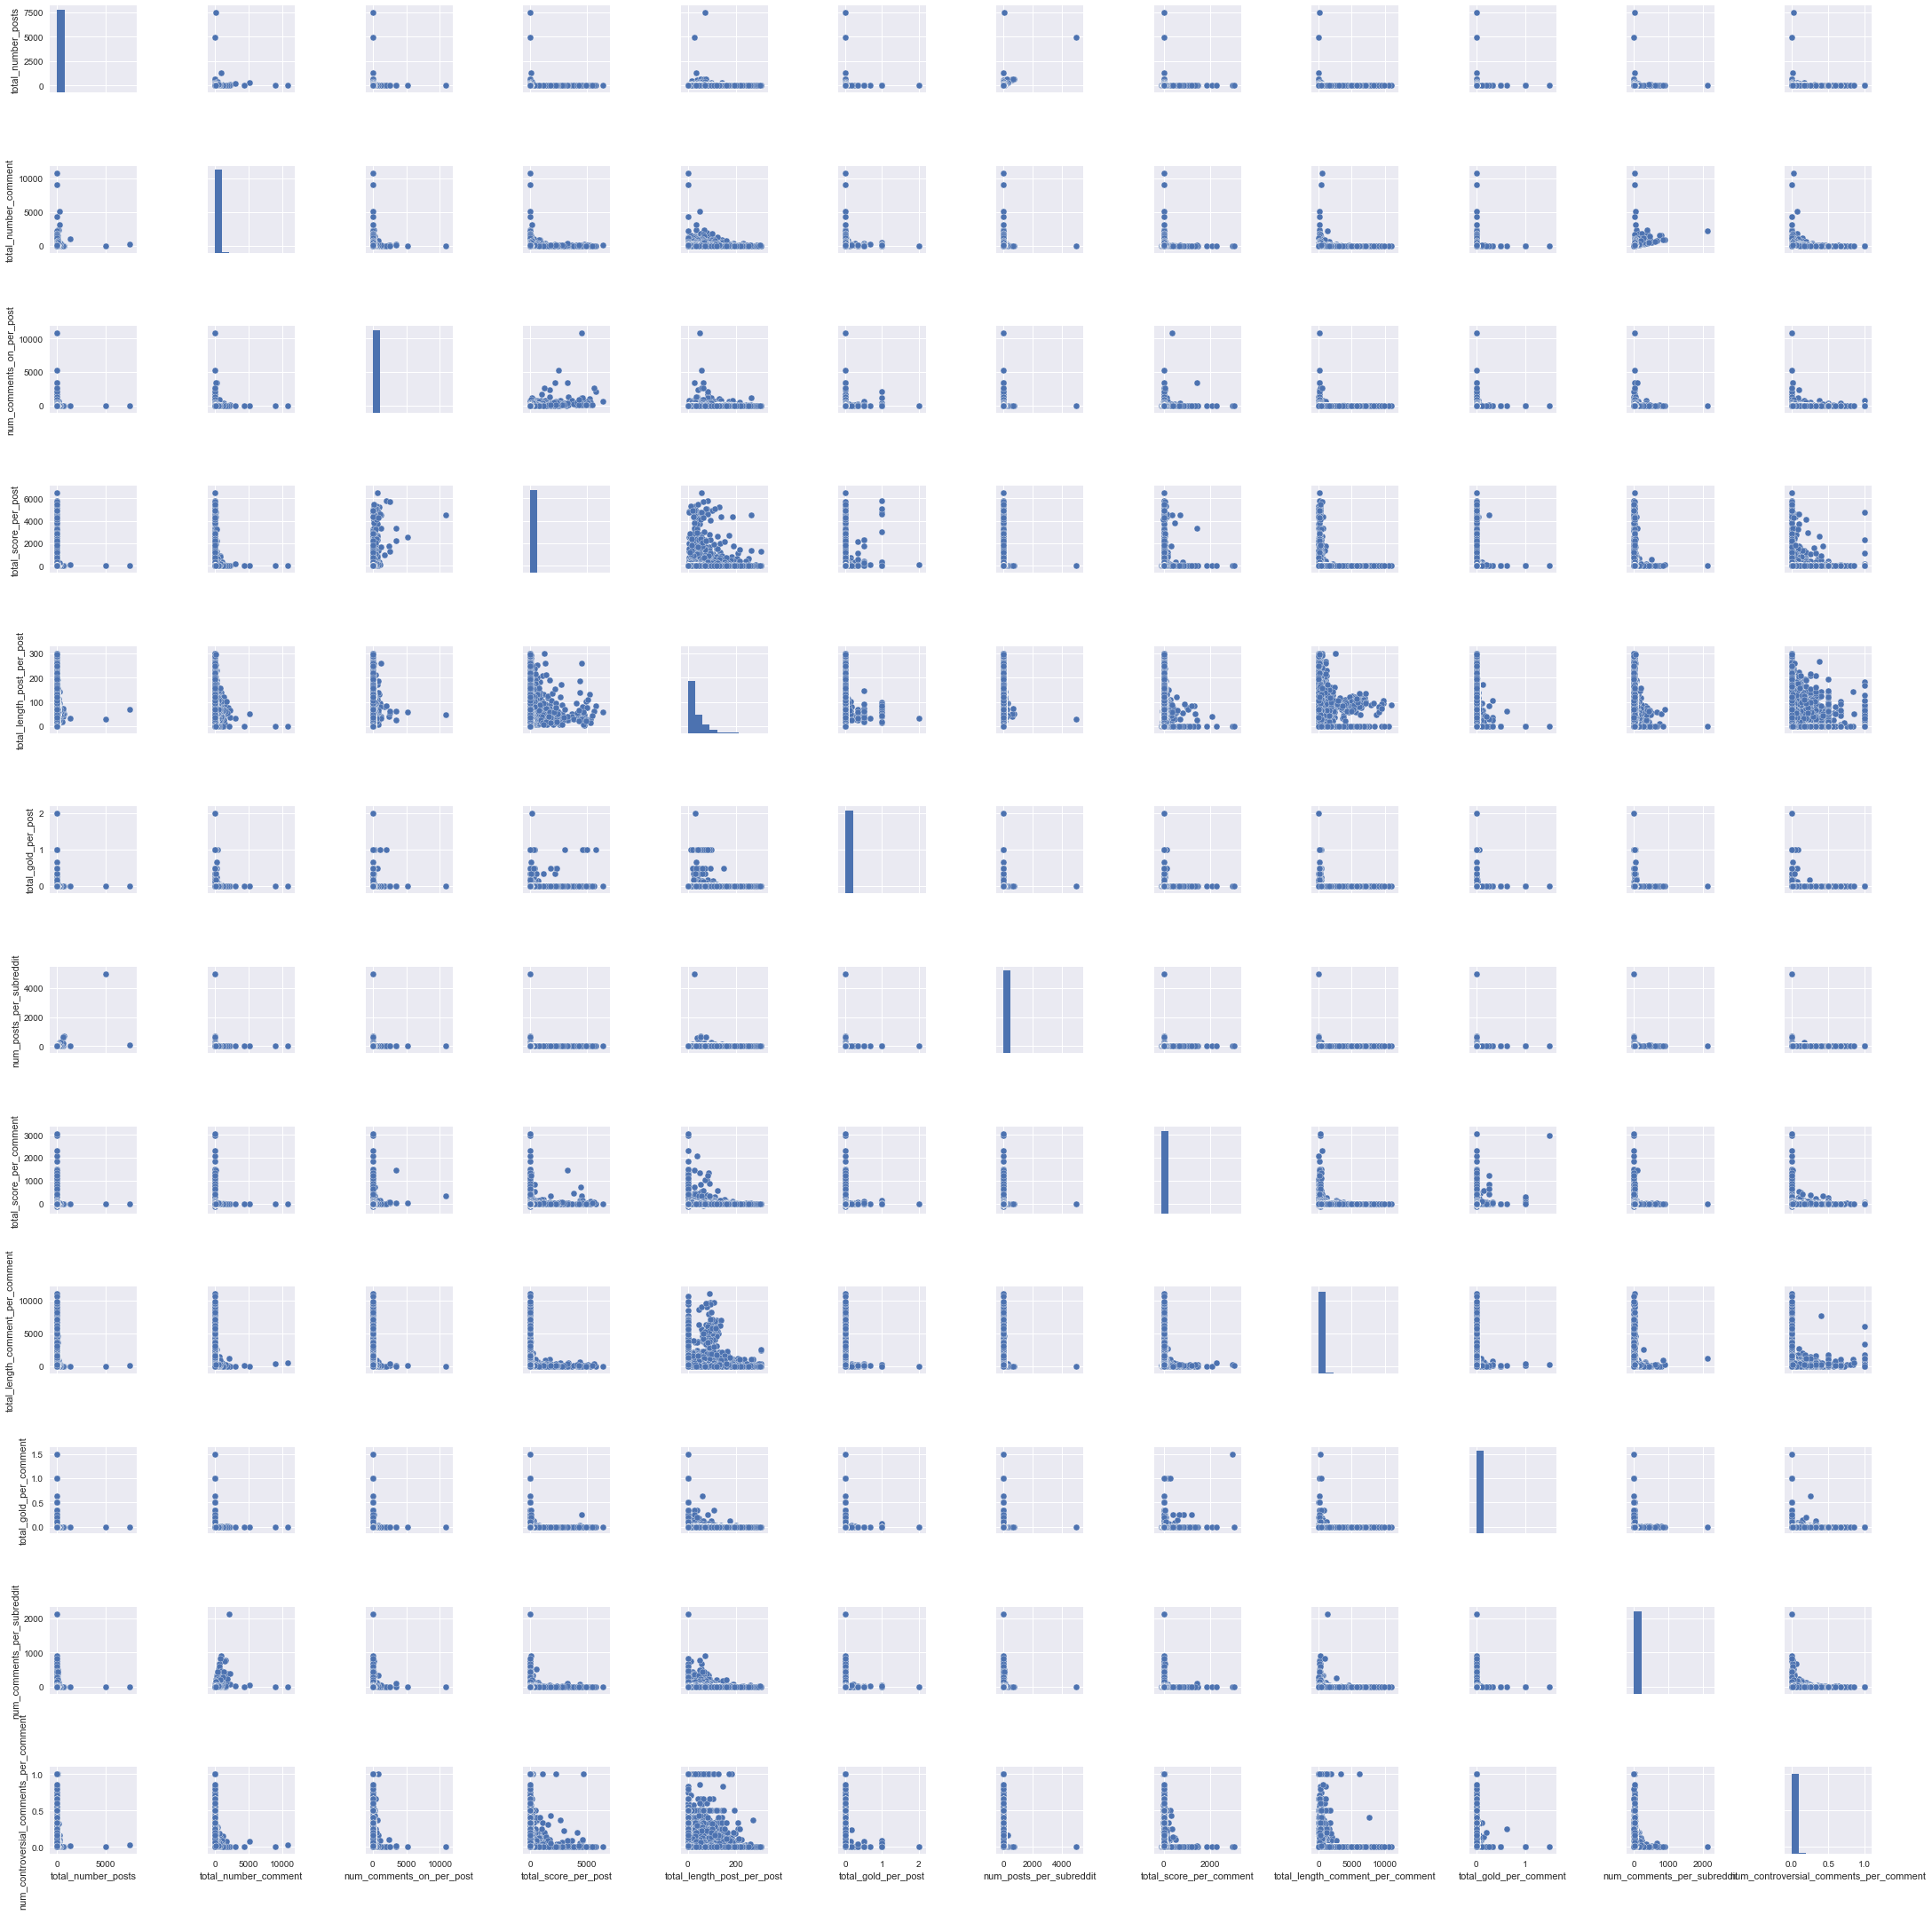

In [66]:
sns.pairplot(data_subset)

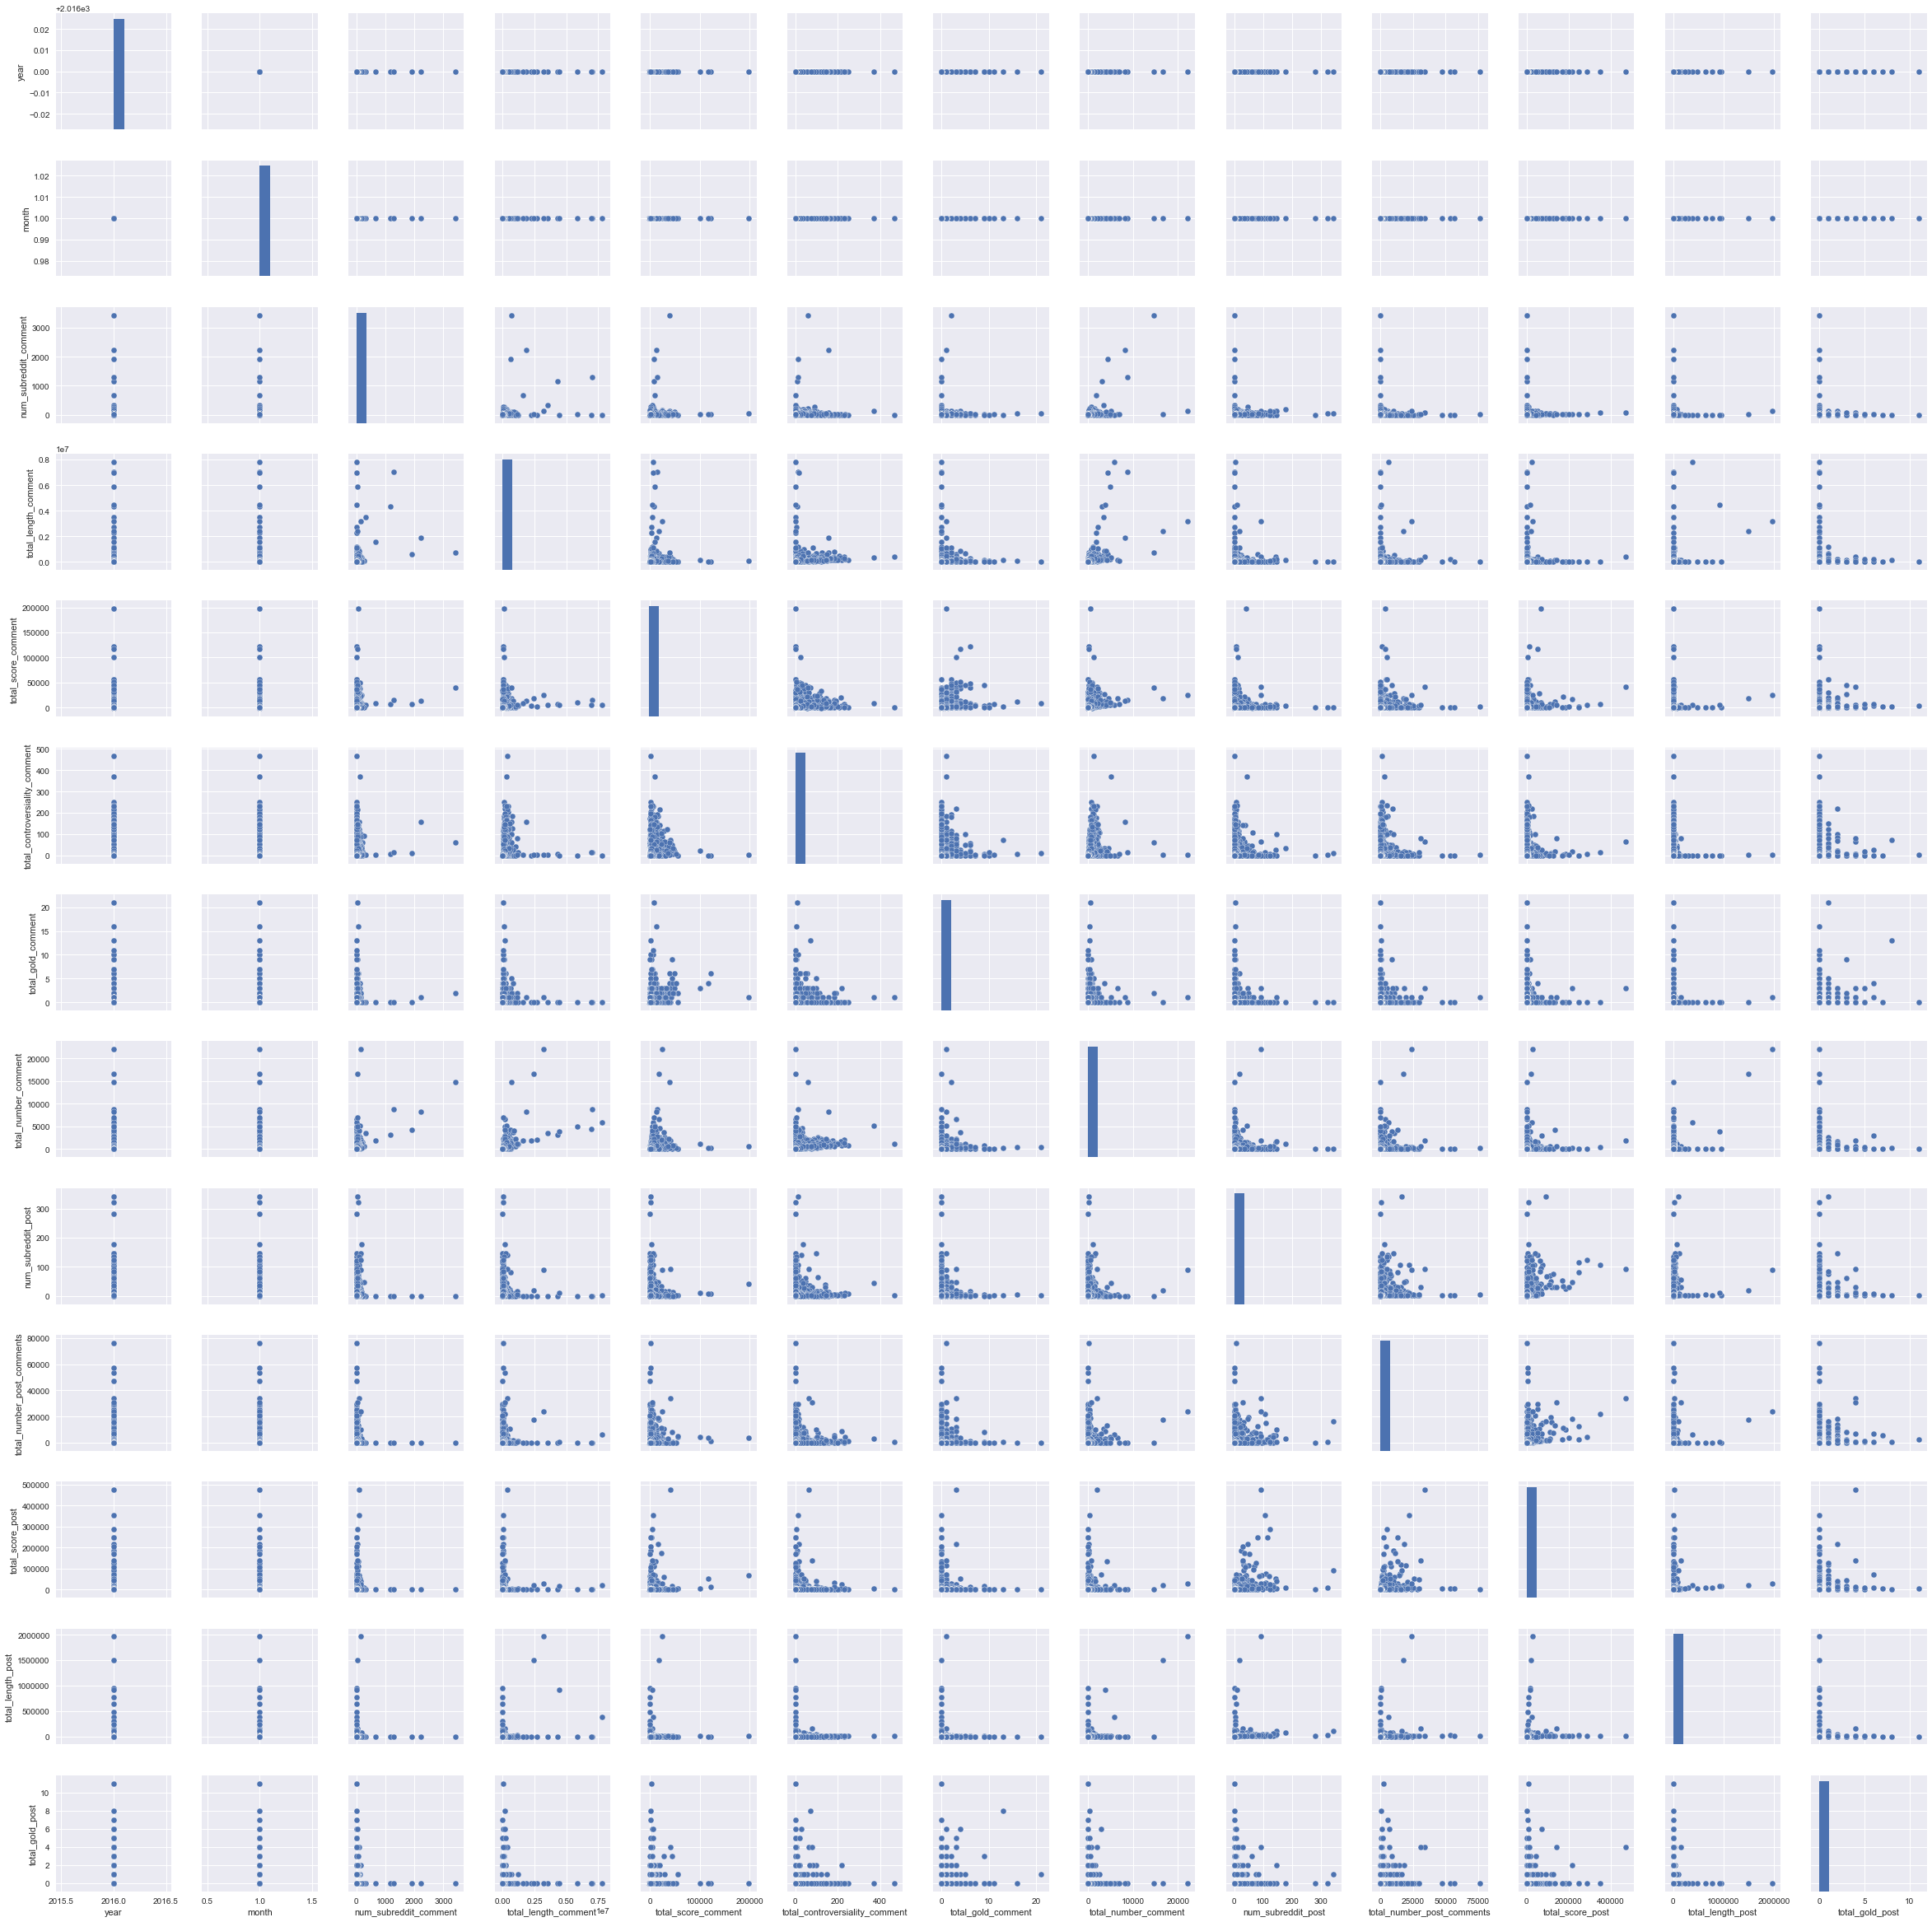

In [18]:
sns.pairplot(df_subset)

# Begin K-Means

In [150]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

np.random.seed(42)

In [55]:
#data_subset = data[data.total_number_posts>100]
#data_subset = data_subset[data_subset.total_number_posts>]
data_subset = data.sample(2000000)

In [68]:
#d = scale(data_subset.drop('author', axis=1))
d = scale(data.drop('author', axis=1))

In [69]:
n_samples, n_features = data.shape

In [72]:
reduced_data = PCA(n_components=2).fit_transform(d)
kmeans = KMeans(init='k-means++', n_clusters=3, n_init=10)
kmeans.fit(reduced_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

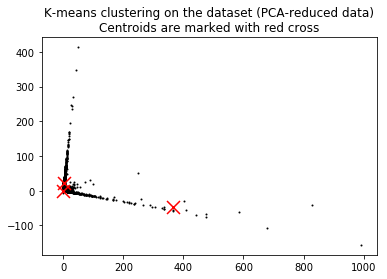

In [85]:
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='r', zorder=5)
plt.title('K-means clustering on the dataset (PCA-reduced data)\n'
          'Centroids are marked with red cross')

In [ ]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
reduced_data = model.fit_transform(d)
kmeans = KMeans(init='k-means++', n_clusters=3, n_init=10)
kmeans.fit(reduced_data)

# Gaussian Mixture Model

In [88]:
import itertools

import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn import mixture

color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold',
                              'darkorange'])


def plot_results(X, Y_, means, covariances, index, title):
    splot = plt.subplot(2, 1, 1 + index)
    for i, (mean, covar, color) in enumerate(zip(
            means, covariances, color_iter)):
        v, w = linalg.eigh(covar)
        v = 2. * np.sqrt(2.) * np.sqrt(v)
        u = w[0] / linalg.norm(w[0])
        # as the DP will not use every component it has access to
        # unless it needs it, we shouldn't plot the redundant
        # components.
        if not np.any(Y_ == i):
            continue
        plt.scatter(X[Y_ == i, 0], X[Y_ == i, 1], .8, color=color)

        # Plot an ellipse to show the Gaussian component
        angle = np.arctan(u[1] / u[0])
        angle = 180. * angle / np.pi  # convert to degrees
        ell = mpl.patches.Ellipse(mean, v[0], v[1], 180. + angle, color=color)
        ell.set_clip_box(splot.bbox)
        ell.set_alpha(0.5)
        splot.add_artist(ell)

    plt.xlim(-9., 5.)
    plt.ylim(-3., 6.)
    plt.xticks(())
    plt.yticks(())
    plt.title(title)

In [91]:
d =data.drop('author', axis=1)
#d = scale(data.drop('author', axis=1))

TypeError: unhashable type: 'numpy.ndarray'

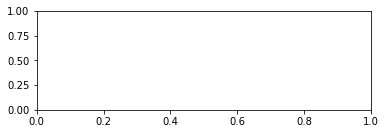

In [93]:
# Fit a Gaussian mixture with EM using five components
gmm = mixture.GaussianMixture(n_components=5, covariance_type='full').fit(d)
plot_results(data, gmm.predict(d), gmm.means_, gmm.covariances_, 0,
             'Gaussian Mixture')

In [ ]:
# Fit a Dirichlet process Gaussian mixture using five components
dpgmm = mixture.BayesianGaussianMixture(n_components=5,
                                        covariance_type='full').fit(d)

In [ ]:
plot_results(d, dpgmm.predict(d), dpgmm.means_, dpgmm.covariances_, 1,
             'Bayesian Gaussian Mixture with a Dirichlet process prior')

plt.show()

# Setting a cutoff for number of posts/comments

In [123]:
post_threshold = 5

In [124]:
comment_threshold = 30

In [125]:
post_filtered = data[data.total_number_posts >= post_threshold]

In [126]:
comment_filtered = data[data.total_number_comment >= comment_threshold]

In [169]:
data_both_filtered = post_filtered[post_filtered.total_number_comment >= comment_threshold]

In [158]:
plt.rcParams['figure.figsize'] = (15, 10)

(0, 500)

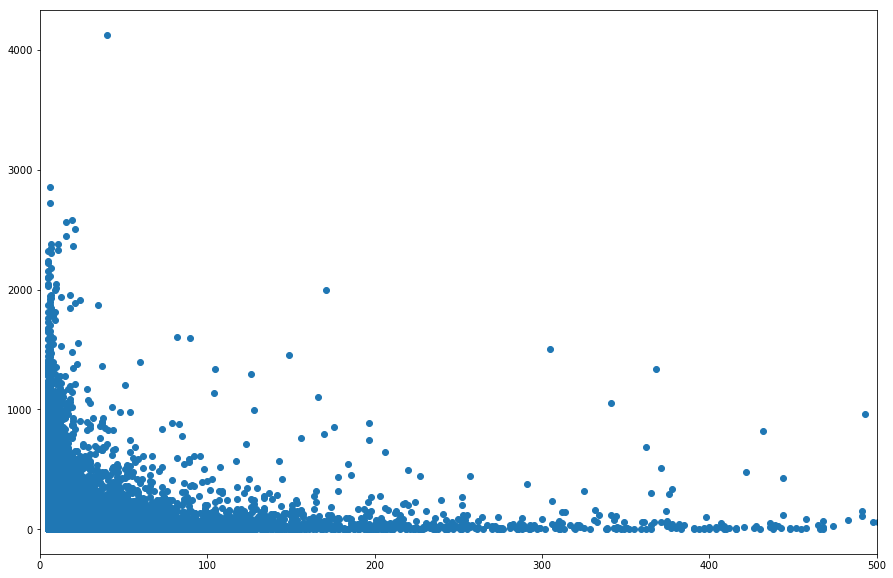

In [172]:
plt.plot(data_both_filtered.total_number_posts, data_both_filtered.total_score_per_post,"o")
#plt.ylim(0, 500)
plt.xlim(0, 500)

In [173]:
data_both_filtered

,author,total_number_posts,total_number_comment,num_comments_on_post_per_post,total_score_per_post,total_length_post_per_post,total_gold_per_post,num_posts_per_subreddit,total_score_per_comment,total_length_comment_per_comment,total_gold_per_comment,num_comments_per_subreddit,num_controversial_comments_per_comment
108391,ManelyStable,6,256,15.833333,5.500000,42.666667,0.000000,6.000000,1.480469,194.070312,0.000000,128.000000,0.062500
108393,Rethious,7,256,38.714286,3.428571,43.428571,0.000000,2.333333,4.988281,197.515625,0.000000,8.533333,0.019531
108394,yacadelic,9,256,18.888889,27.777778,35.888889,0.000000,1.500000,2.531250,95.214844,0.000000,21.333333,0.015625
108396,Deadinsky66,9,256,74.777778,15.333333,37.555556,0.000000,3.000000,4.218750,139.000000,0.000000,36.571429,0.000000
108398,magicsebi,61,256,9.163934,45.672131,85.672131,0.000000,1.794118,10.851562,183.449219,0.000000,6.400000,0.046875
108401,mdmax_i,8,256,8.125000,38.500000,49.375000,0.000000,1.333333,13.468750,107.578125,0.003906,5.818182,0.050781
108402,NeuroRush,8,256,8.750000,1.625000,82.000000,0.000000,1.142857,-0.585938,48.257812,0.000000,1.505882,0.011719
108403,reskon,24,256,5.791667,0.916667,48.875000,0.000000,24.000000,1.347656,177.933594,0.000000,128.000000,0.015625
108406,Satw42,24,256,12.750000,1.291667,17.666667,0.000000,24.000000,1.054688,280.597656,0.000000,256.000000,0.000000
108407,mrd89,47,256,91.914894,52.510638,53.106383,0.000000,23.500000,1.949219,42.617188,0.000000,51.200000,0.003906


In [174]:
#d = scale(data_subset.drop('author', axis=1))
d = scale(data_both_filtered.drop('author', axis=1))

In [175]:
n_samples, n_features = data.shape

In [180]:
kmeans = KMeans(init='k-means++', n_clusters=3, n_init=10)
kmeans.fit(d)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

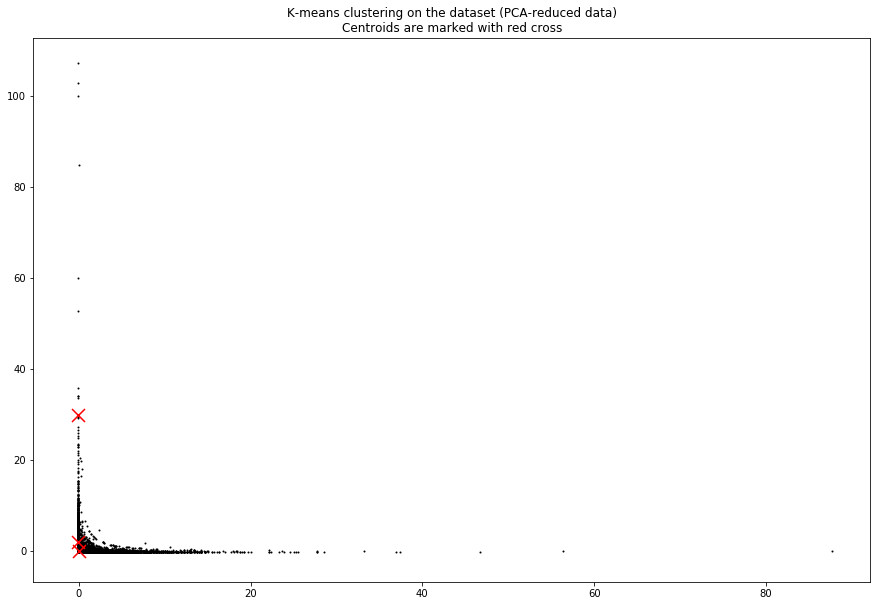

In [209]:
plt.plot(d[:, 9], d[:, 10], 'k.', markersize=2)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 9], centroids[:, 10],
            marker='x', s=169, linewidths=3,
            color='r', zorder=5)
plt.title('K-means clustering on the dataset (PCA-reduced data)\n'
          'Centroids are marked with red cross')

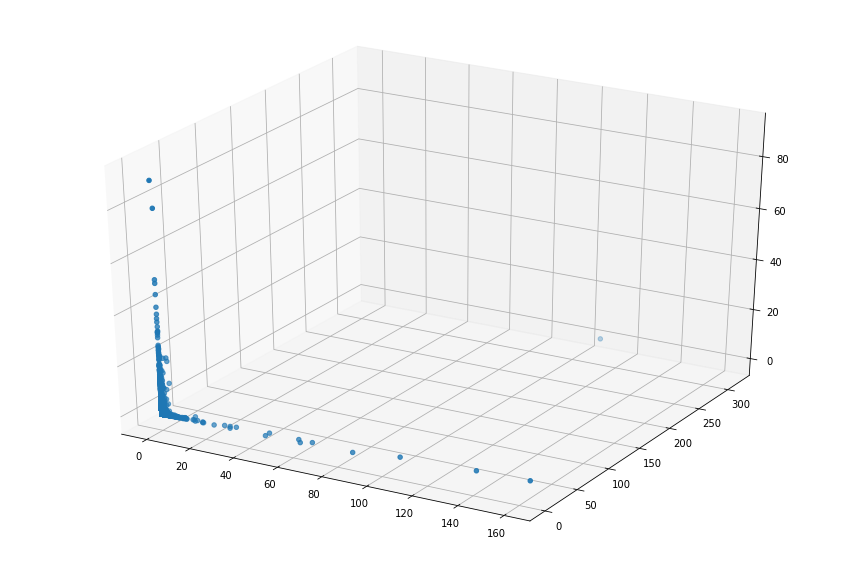

In [210]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(d[:,0], d[:,1], d[:,2])

In [243]:
reduced_data = PCA(n_components=3).fit_transform(d)
kmeans = KMeans(init='k-means++', n_clusters=3, n_init=10)
kmeans.fit(reduced_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

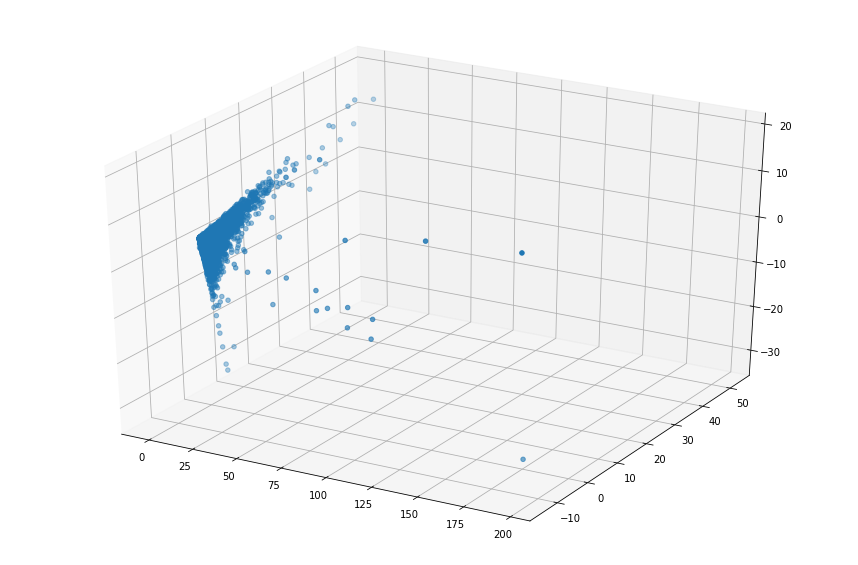

In [216]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reduced_data[:,0], reduced_data[:,1], -1*reduced_data[:,2])


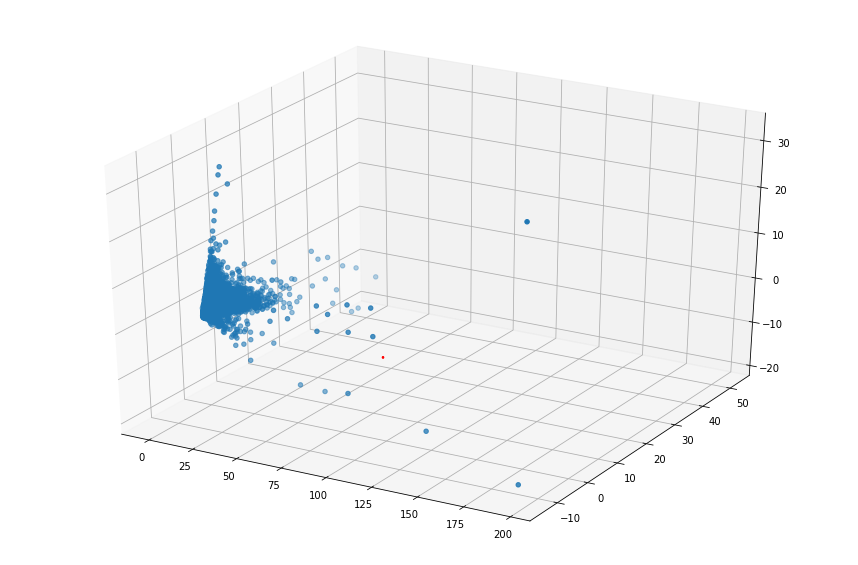

In [245]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(reduced_data[:,0], reduced_data[:,1], reduced_data[:,2])

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],centroids[:, 2],
            marker='x',
            color='r')

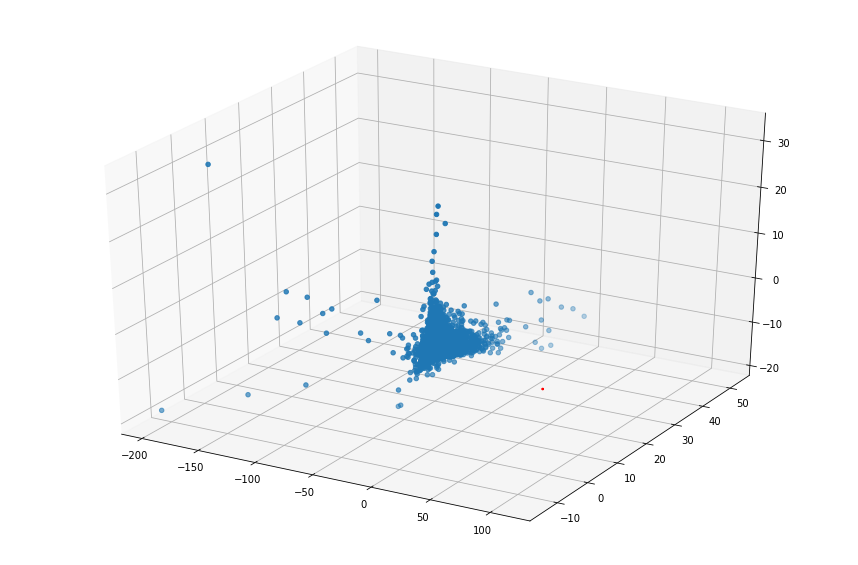

In [244]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(-1*reduced_data[:,0], reduced_data[:,1], reduced_data[:,2])

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],centroids[:, 2],
            marker='x',
            color='r')

In [ ]:
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='r', zorder=5)
plt.title('K-means clustering on the dataset (PCA-reduced data)\n'
          'Centroids are marked with red cross')

In [229]:
data_both_filtered.corr()

,total_number_posts,total_number_comment,num_comments_on_post_per_post,total_score_per_post,total_length_post_per_post,total_gold_per_post,num_posts_per_subreddit,total_score_per_comment,total_length_comment_per_comment,total_gold_per_comment,num_comments_per_subreddit,num_controversial_comments_per_comment
total_number_posts,1.000000,0.415940,-0.006488,0.000533,0.011258,-0.002446,0.467440,-0.004921,0.031053,-0.001611,0.196813,-0.001914
total_number_comment,0.415940,1.000000,0.030565,0.001787,0.005324,0.001712,0.036519,0.001652,0.015112,-0.000189,0.096130,0.012488
num_comments_on_post_per_post,-0.006488,0.030565,1.000000,0.365819,0.054020,0.102504,-0.004279,0.122132,0.010664,0.043662,0.137362,0.052275
total_score_per_post,0.000533,0.001787,0.365819,1.000000,0.055977,0.161080,-0.010379,0.269781,-0.014159,0.076632,-0.020220,0.062102
total_length_post_per_post,0.011258,0.005324,0.054020,0.055977,1.000000,0.021211,0.005464,0.082338,0.175084,0.023003,-0.035523,0.150429
total_gold_per_post,-0.002446,0.001712,0.102504,0.161080,0.021211,1.000000,-0.002040,0.051899,0.015224,0.091777,0.007094,0.012894
num_posts_per_subreddit,0.467440,0.036519,-0.004279,-0.010379,0.005464,-0.002040,1.000000,-0.013453,0.042099,-0.003853,0.406014,-0.012899
total_score_per_comment,-0.004921,0.001652,0.122132,0.269781,0.082338,0.051899,-0.013453,1.000000,-0.011097,0.240395,-0.044730,0.047126
total_length_comment_per_comment,0.031053,0.015112,0.010664,-0.014159,0.175084,0.015224,0.042099,-0.011097,1.000000,0.031114,0.017567,0.059315
total_gold_per_comment,-0.001611,-0.000189,0.043662,0.076632,0.023003,0.091777,-0.003853,0.240395,0.031114,1.000000,-0.012863,0.017978


In [231]:
kmeans.inertia_

267485.5402243585

In [238]:
inertia_per_number_clusters = []
for x in range(1,10):
    km = KMeans(init='k-means++', n_clusters=x, n_init=10)
    km.fit(d)
    inertia_per_number_clusters.append(km.inertia_)
print(inertia_per_number_clusters)

[1239204.0, 1145009.4612390925, 1008809.9629985817, 916932.50091676484, 832999.36232521036, 773492.73196308012, 713791.28331330989, 668939.00597304315, 626982.38064078614]


In [239]:
inertia_per_number_clusters = []
for x in range(1,20):
    km = KMeans(init='k-means++', n_clusters=x, n_init=10)
    km.fit(d)
    inertia_per_number_clusters.append(km.inertia_)
print(inertia_per_number_clusters)

[1239204.0, 1093955.4180868007, 1000012.8063325986, 916044.50794082088, 833000.01090750354, 771502.42269183614, 728377.72995376447, 668929.09798438195, 629570.41213273746, 587623.01168232039, 555202.2740767682, 527213.50135624956, 499562.71237247565, 485517.14941232232, 464222.2664945384, 447101.13014944387, 431586.53002127039, 415844.06821223354, 400953.11393722729]


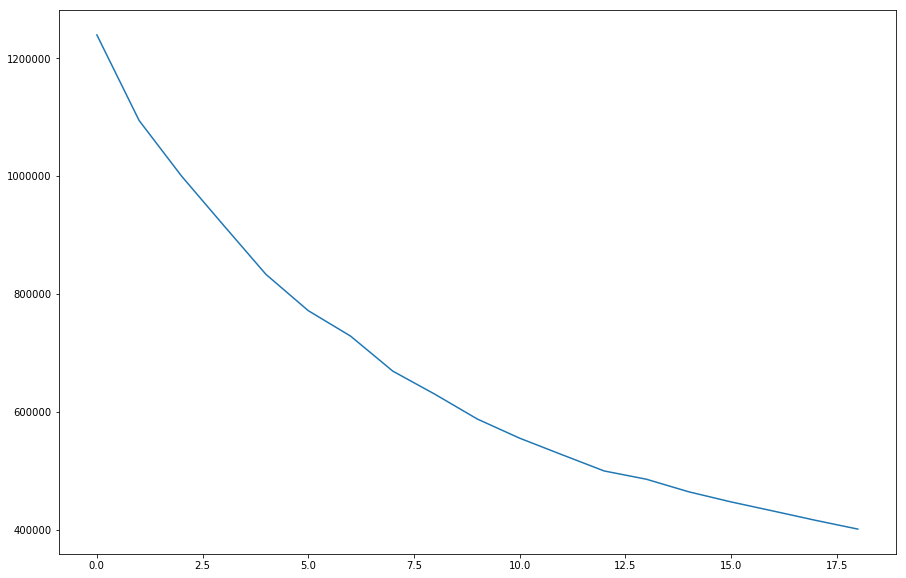

In [240]:
plt.plot(inertia_per_number_clusters)

In [255]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [263]:
labels = pd.DataFrame({'cluster_labels':kmeans.labels_})

In [275]:
np.bincount(kmeans.labels_)

array([99845,  3411,    11])

In [309]:
#d = scale(data_subset.drop('author', axis=1))
d = scale(data_both_filtered.drop('author', axis=1))
kmeans = KMeans(init='k-means++', n_clusters=5, n_init=10)
kmeans.fit(d)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [310]:
np.bincount(kmeans.labels_)

array([ 2704, 99559,    10,   993,     1])

In [311]:
data_both_filtered_labeled = pd.concat([data_both_filtered.set_index(np.arange(data_both_filtered.shape[0])),pd.DataFrame({'cluster_labels':kmeans.labels_})],axis=1)


In [301]:
agg_f = {'total_number_posts':['mean','std'],'total_number_comment':['mean','std'],
       'num_comments_on_post_per_post':['mean','std'], 'total_score_per_post':['mean','std'],
       'total_length_post_per_post':['mean','std'], 'total_gold_per_post':['mean','std'],
       'num_posts_per_subreddit':['mean','std'], 'total_score_per_comment':['mean','std'],
       'total_length_comment_per_comment':['mean','std'], 'total_gold_per_comment':['mean','std'],
       'num_comments_per_subreddit':['mean','std'],
       'num_controversial_comments_per_comment':['mean','std']}

In [312]:
data_both_filtered_labeled.groupby(['cluster_labels']).agg(agg_f)

total_score_per_comment             \
                                  mean        std   
cluster_labels                                      
0                            16.875073  26.647397   
1                             4.972843   6.593007   
2                             1.332209   0.841073   
3                            25.655554  55.271417   
4                             1.080657        NaN   

               total_length_comment_per_comment              \
                                           mean         std   
cluster_labels                                                
0                                    155.738363  120.883686   
1                                    163.646332  132.344030   
2                                    588.079449  521.484672   
3                                    201.545528  250.945785   
4                                    692.361709         NaN   

               total_length_post_per_post            total_gold_per_post  \
                                     mean        std                mean   
cluster_labels                                                             
0                               61.170603  27.888380            0.032958   
1                               54.935721  22.590534            0.000272   
2                               77.778532  14.184389            0.000000   
3                               59.130689  23.473374            0.005363   
4                               45.768271        NaN            0.000059   

                         total_gold_per_comment               ...       \
                     std                   mean       std     ...        
cluster_labels                                                ...        
0               0.080852               0.000508  0.002221     ...        
1               0.004377               0.000091  0.000695     ...        
2               0.000000               0.000005  0.000014     ...        
3               0.048507               0.018209  0.011789     ...        
4                    NaN               0.000009       NaN     ...        

               num_comments_on_post_per_post              \
                                        mean         std   
cluster_labels                                             
0                                 137.391331  220.866069   
1                                  13.843052   17.152619   
2                                   0.648785    0.453977   
3                                  21.093078   50.058015   
4                                  54.677149         NaN   

               num_controversial_comments_per_comment            \
                                                 mean       std   
cluster_labels                                                    
0                                            0.029275  0.040128   
1                                            0.020438  0.030317   
2                                            0.000936  0.002870   
3                                            0.022859  0.031522   
4                                            0.001721       NaN   

               num_comments_per_subreddit              total_number_comment  \
                                     mean          std                 mean   
cluster_labels                                                                
0                               37.395906   236.577227           229.959320   
1                               21.490777    51.227827           152.492572   
2                             2193.527763  3113.152805          9722.900000   
3                               10.122695    13.210229            94.275932   
4                              166.979664          NaN        426967.000000   

                            total_number_posts               
                        std               mean          std  
cluster_labels                                               
0                691.350837          15.075444

In [ ]:
metrics.silhouette_score(d, kmeans.labels_, metric='euclidean')

In [313]:
metrics.calinski_harabaz_score(d, kmeans.labels_)

12044.919230125091

# Clustering investigation with different features

In [4]:
import csv
import sqlite3
import pandas as pd
import matplotlib as plt
%matplotlib inline
import numpy as np

In [5]:
reddit_data = pd.read_csv('../data/reddit_2016_1_all.csv');

In [6]:
# The comments that were deleted were not removed from the data set. We remove the [deleted] user with

reddit_data = reddit_data[reddit_data.author!="[deleted]"]

In [7]:
num_comments_on_post_per_post = pd.DataFrame({'num_comments_on_post_per_post':reddit_data['total_number_post_comments']/reddit_data.total_number_posts}).fillna(0)
total_score_per_post = pd.DataFrame({'total_score_per_post':reddit_data['total_score_post']/reddit_data.total_number_posts}).fillna(0)
total_length_post_per_post = pd.DataFrame({'total_length_post_per_post':reddit_data['total_length_post']/reddit_data.total_number_posts}).fillna(0)
total_gold_per_post = pd.DataFrame({'total_gold_per_post':reddit_data['total_gold_post']/reddit_data.total_number_posts}).fillna(0)
num_posts_per_subreddit = pd.DataFrame({'num_posts_per_subreddit':reddit_data['total_number_posts']/reddit_data.num_subreddit_post}).fillna(0)

total_score_per_comment = pd.DataFrame({'total_score_per_comment':reddit_data['total_score_comment']/reddit_data.total_number_comment}).fillna(0)
total_length_comment_per_comment = pd.DataFrame({'total_length_comment_per_comment':reddit_data['total_length_comment']/reddit_data.total_number_comment}).fillna(0)
total_gold_per_comment = pd.DataFrame({'total_gold_per_comment':reddit_data['total_gold_comment']/reddit_data.total_number_comment}).fillna(0)
num_comments_per_subreddit = pd.DataFrame({'num_comments_per_subreddit':reddit_data['total_number_comment']/reddit_data.num_subreddit_comment}).fillna(0)
num_controversial_comments_per_comment = pd.DataFrame({'num_controversial_comments_per_comment':reddit_data['total_controversiality_comment']/reddit_data.total_number_comment}).fillna(0)

data = pd.concat([reddit_data.author,reddit_data.total_number_posts,reddit_data.total_number_comment,num_comments_on_post_per_post,total_score_per_post,total_length_post_per_post,total_gold_per_post,num_posts_per_subreddit,total_score_per_comment,total_length_comment_per_comment,total_gold_per_comment,num_comments_per_subreddit,num_controversial_comments_per_comment],axis=1).replace(np.inf,0)




# Setting a cutoff for number of posts/comments

In [123]:
post_threshold = 5

In [124]:
comment_threshold = 30

In [125]:
post_filtered = data[data.total_number_posts >= post_threshold]

In [126]:
comment_filtered = data[data.total_number_comment >= comment_threshold]

In [169]:
data_both_filtered = post_filtered[post_filtered.total_number_comment >= comment_threshold]

# Investigating New Features (Non-scaled)

In [12]:
reddit_data

,year,month,author,total_number_posts,num_subreddit_comment,total_length_comment,total_score_comment,total_controversiality_comment,total_gold_comment,total_number_comment,num_subreddit_post,total_number_post_comments,total_score_post,total_length_post,total_gold_post
0,2016,1,bombayrocxxx,5,0,0,0,0,0,0,3,84,1191,256,0
1,2016,1,Pwntstuffs,3,0,0,0,0,0,0,2,20,99,256,0
2,2016,1,jake87455,2,0,0,0,0,0,0,2,0,2,256,0
3,2016,1,ipunchvagina,3,0,0,0,0,0,0,1,0,3,256,0
4,2016,1,Daixxx,1,0,0,0,0,0,0,1,19,0,256,0
5,2016,1,HueyLouise,1,0,0,0,0,0,0,1,1,1,256,0
6,2016,1,Lilrex2015,6,0,0,0,0,0,0,3,0,6,256,0
7,2016,1,AnbuAdani,1,0,0,0,0,0,0,1,0,1,256,0
8,2016,1,HutHutHaiku,3,0,0,0,0,0,0,3,1,8,256,0
9,2016,1,scorp86,2,0,0,0,0,0,0,1,5,162,256,0


In [ ]:
['total_number_posts','total_number_post_comments', total_score_post,'total_number_comment', total_score_comment]

In [14]:
reddit_subspace = pd.DataFrame({"total_number_posts":reddit_data.total_number_posts, "total_number_post_comments":reddit_data.total_number_post_comments,"total_score_post":reddit_data.total_score_post,"total_number_comment":reddit_data.total_number_comment,"total_score_comment":reddit_data.total_score_comment})


In [16]:
reddit_subspace.corr()

,total_number_comment,total_number_post_comments,total_number_posts,total_score_comment,total_score_post
total_number_comment,1.000000,0.807284,0.290053,0.499455,0.086989
total_number_post_comments,0.807284,1.000000,0.238278,0.364322,0.218569
total_number_posts,0.290053,0.238278,1.000000,0.130630,0.162801
total_score_comment,0.499455,0.364322,0.130630,1.000000,0.160155
total_score_post,0.086989,0.218569,0.162801,0.160155,1.000000


In [18]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

In [19]:
#d = scale(data_subset.drop('author', axis=1))
d = scale(reddit_subspace)
kmeans = KMeans(init='k-means++', n_clusters=5, n_init=10)
kmeans.fit(d)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [20]:
np.bincount(kmeans.labels_)

array([3445832,      26,       1,      48,   20891])

In [21]:
data_both_filtered_labeled = pd.concat([reddit_subspace.set_index(np.arange(reddit_subspace.shape[0])),pd.DataFrame({'cluster_labels':kmeans.labels_})],axis=1)

In [22]:
agg_f = {'total_number_posts':['mean','std'],'total_number_comment':['mean','std'],
       'total_number_post_comments':['mean','std'], 'total_score_comment':['mean','std'],
       'total_score_post':['mean','std']}

In [23]:
data_both_filtered_labeled.groupby(['cluster_labels']).agg(agg_f)

total_number_comment              total_score_comment  \
                               mean          std                mean   
cluster_labels                                                         
0                         14.162740    40.955909           70.799696   
1                       3560.192308  7107.984969         4639.769231   
2                     426967.000000          NaN       461405.000000   
3                        382.479167   713.469288        10511.604167   
4                        404.517783   574.396396         5234.325116   

                             total_number_post_comments                \
                         std                       mean           std   
cluster_labels                                                          
0                 231.748794                  12.899069    100.128870   
1                9287.360664                3745.192308   7387.390592   
2                        NaN              933667.000000           NaN   
3               14266.860225               25910.625000  73206.329275   
4                5204.382847                 432.555885   2044.176546   

               total_number_posts              total_score_post                 
                             mean          std             mean            std  
cluster_labels                                                                  
0                        1.450223     9.770446        36.938817     326.366231  
1                    10828.538462  6248.383658     14697.615385   12483.990199  
2                    17076.000000          NaN    132741.000000            NaN  
3                      589.145833   846.426254    215066.625000  130347.242782  
4                       19.130726   159.031580      1469.546790    5916.723110

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

np.random.seed(42)

In [55]:
#data_subset = data[data.total_number_posts>100]
#data_subset = data_subset[data_subset.total_number_posts>]
data_subset = data.sample(2000000)

In [68]:
#d = scale(data_subset.drop('author', axis=1))
d = scale(data.drop('author', axis=1))

In [25]:
n_samples, n_features = reddit_subspace.shape

In [30]:
reduced_data = PCA(n_components=3).fit_transform(reddit_subspace)
kmeans = KMeans(init='k-means++', n_clusters=5, n_init=10)
kmeans.fit(reduced_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

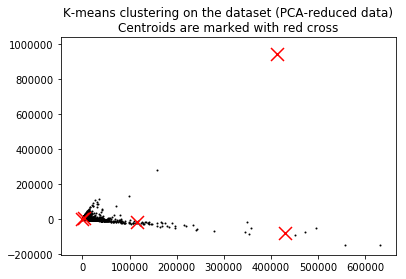

In [31]:
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='r', zorder=5)
plt.title('K-means clustering on the dataset (PCA-reduced data)\n'
          'Centroids are marked with red cross')

In [32]:
reddit_data

,year,month,author,total_number_posts,num_subreddit_comment,total_length_comment,total_score_comment,total_controversiality_comment,total_gold_comment,total_number_comment,num_subreddit_post,total_number_post_comments,total_score_post,total_length_post,total_gold_post
0,2016,1,bombayrocxxx,5,0,0,0,0,0,0,3,84,1191,256,0
1,2016,1,Pwntstuffs,3,0,0,0,0,0,0,2,20,99,256,0
2,2016,1,jake87455,2,0,0,0,0,0,0,2,0,2,256,0
3,2016,1,ipunchvagina,3,0,0,0,0,0,0,1,0,3,256,0
4,2016,1,Daixxx,1,0,0,0,0,0,0,1,19,0,256,0
5,2016,1,HueyLouise,1,0,0,0,0,0,0,1,1,1,256,0
6,2016,1,Lilrex2015,6,0,0,0,0,0,0,3,0,6,256,0
7,2016,1,AnbuAdani,1,0,0,0,0,0,0,1,0,1,256,0
8,2016,1,HutHutHaiku,3,0,0,0,0,0,0,3,1,8,256,0
9,2016,1,scorp86,2,0,0,0,0,0,0,1,5,162,256,0


(0, 5000)

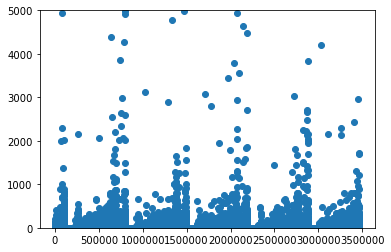

In [40]:
plt.scatter(reddit_data.index,reddit_data.total_number_posts)
plt.ylim(0, 5000)

(0, 10000)

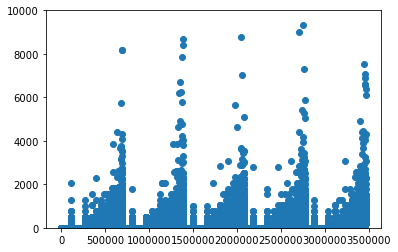

In [38]:
plt.scatter(reddit_data.index,reddit_data.total_number_comment)
plt.ylim(0, 10000)

(0, 10000)

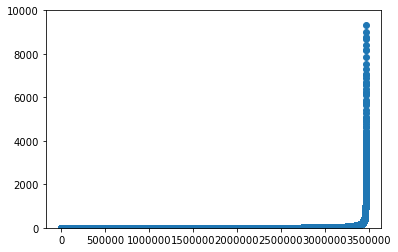

In [42]:
plt.scatter(reddit_data.index,reddit_data.sort_values('total_number_comment').total_number_comment)
plt.ylim(0, 10000)

In [46]:
reddit_data[['author','num_subreddit_post']]

,author,num_subreddit_post
0,bombayrocxxx,3
1,Pwntstuffs,2
2,jake87455,2
3,ipunchvagina,1
4,Daixxx,1
5,HueyLouise,1
6,Lilrex2015,3
7,AnbuAdani,1
8,HutHutHaiku,3
9,scorp86,1


In [57]:
reddit_data.num_subreddit_post.unique()

array([   3,    2,    1,    4,    6,    0,    7,    9,    5,   27,   20,
         12,   91,    8,   19,   18,   10,   13,   23,   16,   24,   11,
         28,   15,   14,   17,   21,   25,   22,  121,   29,   31,  366,
         32,  147,   33,   76,   46,   41,   43,   47,   35,   54,   34,
         77,   62,   66,   55,   30,   37,   71,   65,   26,   40,   39,
         56,   42,  135,   38,   70,   57,   92,   36,  109,   58,   44,
         59,  101,   93,   48,  123,   45,  136,   52,   84,  106,  105,
        343,  104,  107,   72,   67,  131,   50,   53,   60,   51,  122,
         98,   49,  171,  167,   81,   68,   64,   83,   85,  183,   63,
         89,  108,   95,  173,   74,  542,  137,  113,  111,  160,  281,
        142,   73,   96,  114,  124,  158,   88,   61,   69,  322,  128,
         82,  263,  269,  116, 1184,  146,  273,  115,   87,   75,  110,
        190,  275,  247,  177,   80,  159,  162,   90,  134,  248,  403,
        103,   79,  494,   99,  139])